In [6]:
# 기본 import 패키지
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

## 2.1 분류와 회귀
지도 학습에는 분류*classification*와 회귀*regression*가 있다.  
 * **분류**: 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것. 두 개의 클래스로 분류하는 이진 분류*binary classification*와 셋 이상의 클래스로 분류하는 다중 분류*multiclass classification*로 나뉜다.
  * NOTE: 이진 분류에서 한 클래스를 **양성** *positive*, 다른 클래스를 **음성** *negative*이라고도 한다. 이는 장점을 나타내는 것이 아니라 학습하고자 하는 대상을 의미한다. 어떤 것을 양성이라고 할지는 주관적인 문제이다.
 * **회귀**: 연속적인 숫자(실수)를 예측하는 것. 출력 값에 연속성이 있다.

## 2.2 일반화, 과대적합, 과소적합
모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있게 된 것을 훈련 세트에서 테스트 세트로 **일반화** *generalization*되었다고 한다. 복잡한 모델에서는 훈련 세트에만 정확한 모델이 될 수 있다.

가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 **과대적합** *overfitting*이라고 한다. 모델이 훈련 세트에 너무 가깝게 맞춰져 새로운 데이터에 일반화되기 어려울 때 일어난다. 반대로 모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하며 훈련 세트에도 잘 맞지 않는다. 너무 간단한 모델이 선택되는 것을 **과소적합** *underfitting*이라고 한다.

좋은 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

### 모델 복잡도와 데이터셋 크기의 관계
데이터셋에 다양한 데이터 포인트가 많으면 과대적합 없이 더 복잡한 모델을 만들 수 있다. 큰 데이터셋은 더 복잡한 모델을 만드는데 도움을 주지만 중복된 데이터나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않는다.

## 2.3 지도 학습 알고리즘
유명한 알고리즘들을 설명한다. 상세한 내용은 http://scikit-learn.org/stable/documentation 참고

### 예제에 사용할 데이터셋
* forge 데이터셋: 인위적으로 만든 이진 분류 데이터셋. 데이터 포인트 26개와 특성 2개를 가진다.

X.shape: (26, 2)


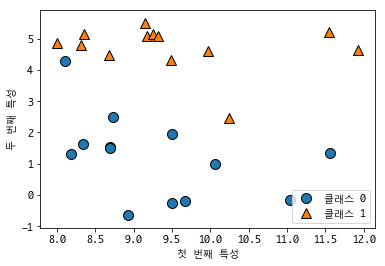

In [7]:
# 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그린다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

* wave 데이터셋: 회귀 알고리즘 설명에 사용한다.입력 특성 하나와 모델링할 타깃 변수를 가진다.

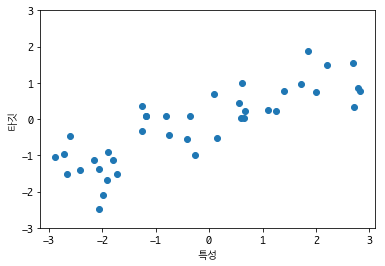

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

* cancer 데이터셋 : 위스콘신 유방암 데이터셋. 유방암 종양의 임상 데이터가 기록된 실제 데이터셋.  
569개의 데이터와 30개의 특성을 가진다. 그중 212개는 악성이고 357개는 양성이다.

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))
print("데이터의 형태: {}".format(cancer.data.shape))
print("클래스별 샘플 개수:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("특성 이름:\n{}".format(cancer.feature_names))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
데이터의 형태: (569, 30)
클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}
특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


* boston 데이터셋 : 회귀분석용 보스턴 주택가격 데이터셋. 범죄율, 강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변 주택의 평균 가격을 예측한다. 데이터 506개와 특성 13개가 있다.

 13개의 특성뿐 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장할 수 있다. 이처럼 특성을 유도해내는 것을 **특성 공학** *feature engineering*이라고 한다. `load_extended_boston` 함수를 이용해 불러들인 결과엔 기존 특성을 중복을 포함해 2개씩 짝지은 91개의 특성이 추가돼 총 104개의 특성이 있다.

 * 중복을 포함한 조합 공식 : $\binom{N+k-1}{K} = {14! \over (14-2)!}=91$

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shape: {}".format(boston.data.shape))

shape: (506, 13)


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-최근접 이웃
k-NN*k-Nearest Neighbors* 알고리즘: 가장 간단한 머신러닝 알고리즘. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 것의 전부이다. 예측할 땐 훈련 데이터셋에서 가장 가까운 데이터를 찾는다.

#### k-최근접 이웃 분류
forge 데이터셋을 분류했다.  
$k>1$일 수도 있으며 이 경우 최근접 k개중 가장 많은 클래스를 레이블로 지정한다.

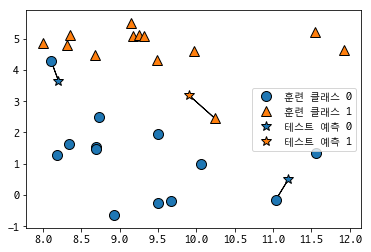

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

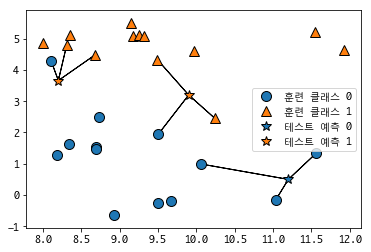

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  # 훈련 세트와 테스트 세트로 나눔

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)  # 훈련 데이터를 통해 분류 모델 학습

print("테스트 세트 예측: {}".format(clf.predict(X_test)))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


#### KNeighborsClassifier 분석
테스트 포인트의 예측을 xy평면에 그려볼 수 있다. 이를 통해 **결정 경계** *decision boundary*를 볼 수 있다.

이웃을 하나 선택했을 때는 경계가 훈련 데이터에 가깝게 따라가고 있지만 이웃의 수를 늘리면 경계가 더 부드러워진다. 부드러운 경계는 더 단순한 모델을 말한다. 즉, 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다. 극단적으로 모든 훈련 데이터를 이웃으로 지정하는 경우 모든 테스트 데이터가 같은 값을 가지게 된다.

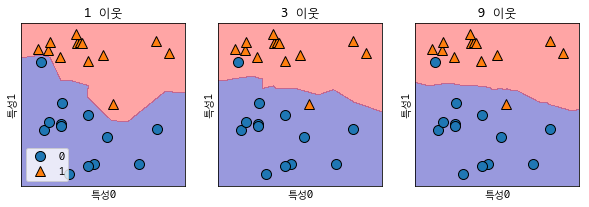

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환하기 때문에 객체 생성과 fit 메서드를 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend(loc=3)

유방암 데이터셋을 사용한 복잡도와 일반화 사이의 관계

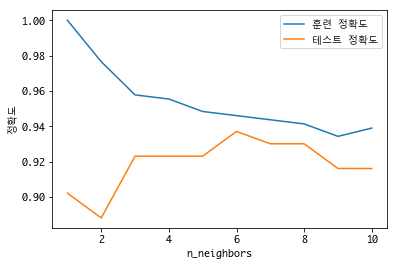

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

train_accuracy = []
test_accuracy = []
# 1에서 10까지 이웃을 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, train_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

이웃이 1일때는 훈련 데이터의 예측은 완벽하지만 이웃이 늘어나면 정확도가 낮아진다. 테스트 세트의 정확도는 이웃을 많이 사용했을 때가 더 높다. 이는 1-이웃일땐 모델이 너무 복잡해지는 것을 의미한다. 이웃이 10일땐 모델이 너무 단순해서 정확도가 낮아진다. 정확도가 가장 높을 때는 이웃이 6일 때이다.

#### k-최근접 이웃 회귀
k-최근접 이웃 알고리즘은 회귀 분석에도 쓰인다. wave 데이터셋을 이용해서 회귀 분석을 해본다.  
이웃을 둘 이상 사용할 경우 이웃 간의 평균이 예측이 된다.

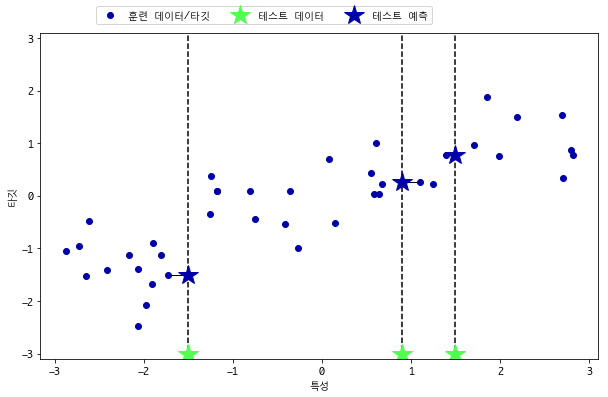

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

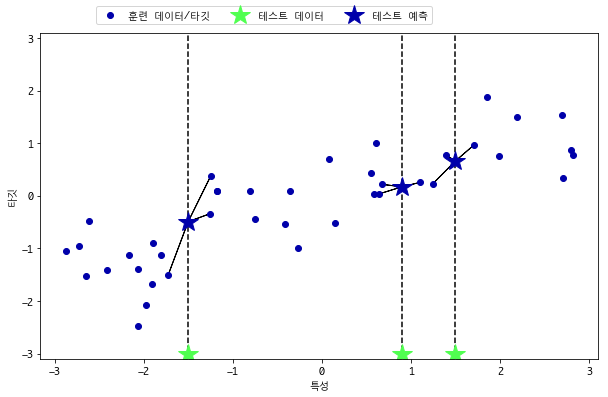

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn에서 회귀를 위한 k-NN 알고리즘은 `KNeighborsRegressor`에 구현되어 있다.

회귀에서 score는 $R^2$값을 반환한다. $R^2$는 결정 계수로 회귀 모델에서 예측의 적합도를 0과 1사이의 값으로 계산한 것이다.

* $R^2=1-{\sum (y-\hat{y})^2 \over \sum (y-\bar{y})^2}$ , $\bar{y}$는 타겟값의 평균, $\hat{y}$는 모델의 예측값

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터를 사용해 모델 학습
reg.fit(X_train, y_train)

print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2:\n{:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2:
0.83


#### KNeighborsRegressor 분석
이 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있다.

이웃을 하나만 사용할 때는 훈련 세트의 데이터가 예측에 주는 영향이 크다. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻게 된다.

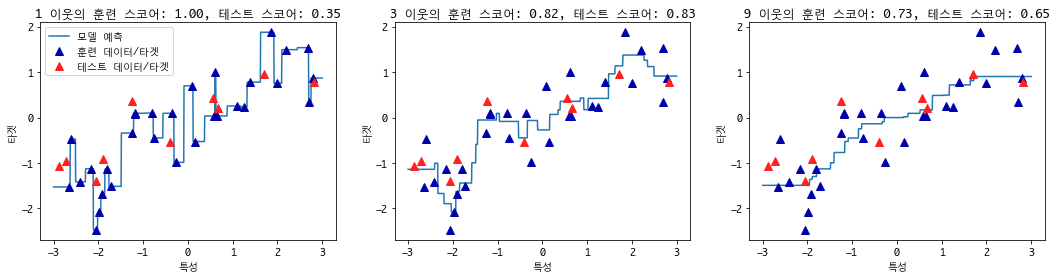

In [20]:
fig, axes = plt.subplots(1,3, figsize=(18,4))
# -3 ~ 3 사이에 1000개의 데이터 생성
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, '^', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f}, 테스트 스코어: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타겟")

axes[0].legend(["모델 예측", "훈련 데이터/타겟", "테스트 데이터/타겟"], loc="best")            

#### 장단점과 매개변수
KNeighbors 분류기의 중요한 매개변수 : 데이터 포인트 사이의 거리를 재는 방법, 이웃의 수  
거리 재는 방법은 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용한다.

k-NN의 장점 : 이해하기 쉬운 모델, 많은 조정 없이 좋은 성능을 발휘하기도 한다. 모델 생성이 빠르다.(단순히 읽고 저장하는 것으로 생성 완료)

k-NN의 단점 : 훈련 세트가 매우 크면 예측이 느려진다. 수백개 이상의 많은 특성을 가진 데이터셋에는 잘 동작하지 않는다. 특성 값 대부분이 0인 데이터셋에도 잘 작동하지 않는다.

### 선형 모델 
선형 모델은 입력 특성에 대한 **선형 함수**를 만들어 예측을 수행한다.

#### 회귀의 선형 모델
일반화된 예측 함수는 다음과 같다 $$\hat{y}=w[0]\times x[0]+w[1]\times x[1]+...+w[p]\times x[p]+b$$
$x[0]$부터 $x[p]$까지는 하나의 데이터 포인트에 대한 특성이며, $w$와 $b$는 모델이 학습할 파라미터, $\hat{y}$은 모델이 만들어낸 예측값.  
특성이 하나인 데이터셋이라면 다음과 같다. $$\hat{y}=w[0]\times x[0]+b$$
$w[0]$은 기울기, $b$는 y 절편.

1차원 wave 데이터셋으로 파라미터를 직선처럼 되도록 학습시키자.

w[0]: 0.393906  b: -0.031804


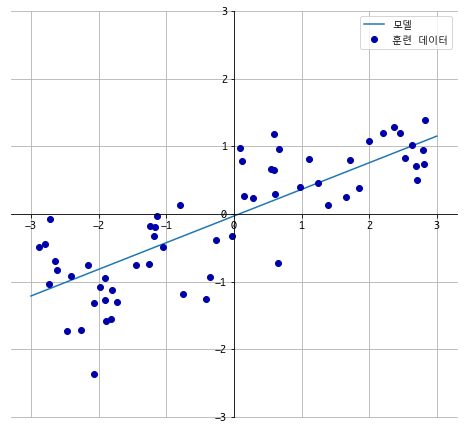

In [21]:
mglearn.plots.plot_linear_regression_wave()

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면, 그 이상일 땐 초평면*hyperplane*이 된다. 직선을 사용한 예측은 데이터의 상세 정보를 모두 잃어버린 것 같지만 특성이 많은 데이터셋이라면 매우 훌륭한 성능을 낼 수 있다. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃도 완벽하게 선형 함수로 모델링할 수 있다.

* 선형 대수에서 방정식(훈련 데이터)보다 미지수(모델 파라미터)가 많은 경우를 불충분한 시스템이라고 하며 일반적으로 무수히 많은 해가 존재한다.

선형 회귀 모델은 파라미터를 학습하는 방법과 모델의 복잡도를 제어하는 방법에 따라 다양하다.

#### 선형 회귀(최소제곱법)
**선형 회귀** *linear regression* 또는 **최소제곱법** *OLS, ordinary least squares*은 가장 간단하고 오래된 선형 알고리즘이다. 예측과 타깃 y사이의 **평균제곱오차** *mean squared error*를 최소화하는 파라미터 w와 b를 찾는다. 매개변수가 없는 것이 장점이지만 따라서 모델의 복잡도를 제어할 방법도 없다.
$MSE={1 \over n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$

기울기(w)는 **가중치** *weight* 또는 **계수** *coefficient*라고 하며 lr 객체의 `coef_` 속성에 저장되어 있고 편향 *offset*또는 절편*intercept* 파라미터(b)는 `intercept_` 속성에 저장되어 있다. scikei-learn은 훈련 데이터에서 유도된 속성은 사용자가 지정한 매개변수와 구분하기 위해 항상 끝에 밑줄을 붙인다.

In [22]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746
훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


$R^2$ 값이 0.66인 것은 좋은 결과가 아니다. 훈련 세트와 테스트 세트의 점수가 비슷한데 이는 과소적합인 상태를 의미한다. 1차원 데이터셋에서는 모델이 단순하므로 과대적합을 걱정할 필요가 없지만 고차원 데이터셋에서는 과대적합의 가능성이 높다.  
보스턴 주택가격 데이터셋의 경우 훈련 세트는 예측이 정확하지만 테스트 세트에서는 매우 낮다. 이는 과대적합되었다는 의미이다. 복잡도를 제어하기 위해 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 **릿지** 회귀이다.

In [23]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


#### 릿지 회귀
과대적합이 되지 않도록 모델을 강제로 제한하는 규제*regularization*을 둔다. 릿지 회귀는 가중치의 절댓값을 가능한 한 작게 만드려 한다. 릿지 회귀에 사용하는 규제 방식을 L2 규제라고 한다.

* 수학적으로 릿지는 계수의 L2 노름(norm)의 제곱을 페널티로 적용한다. 평균제곱오차 식에 $\alpha \sum_{j=1}^m w_i^2$ 항이 추가된다. $\alpha$의 크기에 따라 페널티의 효과가 달라진다.(기본값:1.0) 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움이 된다.

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75
훈련 세트 점수: 0.79
테스트 세트 점수: 0.64
훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


alpha 값에 따라 모델의 `coef_` 속성이 어떻게 달라지는가.

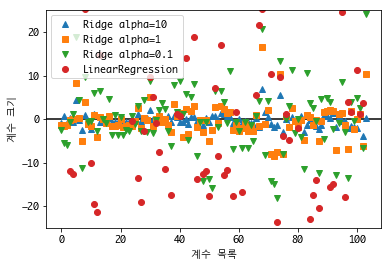

In [25]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

규제의 효과를 이해하는 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시키는 것이다. 보스턴 주택 데이터셋에서 여러 크기로 샘플링해보자.(데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 **학습 곡선** *learning curve*이라고 한다.)

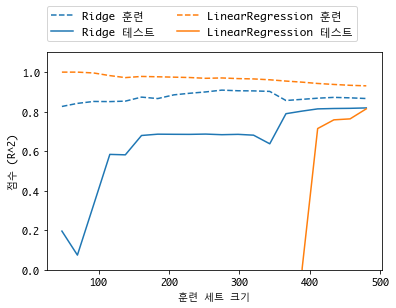

In [26]:
mglearn.plots.plot_ridge_n_samples()

릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 선형회귀보다 낮다. 하지만 테스트 데이터에서는 릿지의 점수가 더 높다. 특히 선형 회귀는 데이터셋 크기가 400 미만일 땐 어떤 것도 학습하지 못하고 있다. 두 모델의 성능은 데이터가 많아질수록 좋아진다. 데이터가 충분하다면 규제 항이 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아진다. 또 선형 회귀의 훈련 데이터 성능이 데이터가 많아질수록 감소하는데, 이는 데이터가 많아지면 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.

#### 라쏘
선형 회귀에 규제를 적용하는데 릿지의 대안으로 Lasso가 있다. 라쏘에서도 계수를 0에 가깝게 만들려고 하지만 방식을 L1 규제를 사용한다. L1 규제를 사용하면 어떤 계수는 정말 0이 된다.(모델에서 완전히 제외되는 특성이 생긴다.) 따라서 특성 선택*feature selection*이 자동으로 이뤄진다.

* 라쏘는 계수 벡터의 L1 노름(계수의 절댓값의 합)을 페널티로 사용한다. 평균제곱오차 식에 $\alpha \sum_{j=1}^m 	\left| w_i \right|$항이 추가된다. 릿지와 마찬가지로 $\alpha$의 크기에 따라 페널티의 효과가 달라진다.

확장된 보스턴 주택가격 데이터셋에 라쏘를 적용한다.

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


두 세트에서 모두 결과가 좋지 않다. 이는 과소적합이며 105개의 특성 중 4개만 사용되었다. 과소적합을 줄이기 위해  alpha 값을 줄여본다. alpha값을 줄이기 위해서는 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 한다.

alpha를 낮추면 모델의 복잡도가 증가하여 성능이 좋아진다. 사용된 특성이 33개뿐이라 모델을 분석하기가 더 쉽다. alpha를 지나치게 낮추면 과대적합이 된다.

In [28]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33
훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 94


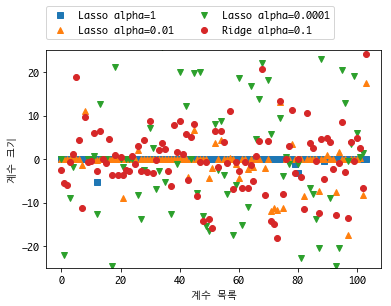

In [29]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

두 모델 중 보통은 릿지 회귀를 선호한다. 하지만 특성이 많고 그중 일부분만 중요하다면 라쏘가 더 좋은 선택일 수 있다. scikit-learn은 라쏘와 릿지의 페널티를 결합한 ElasticNet도 제공한다. 이 조합은 최고의 성능을 내지만 L1, L2 규제를 위한 매개변수 두 개를 조정해야 한다.

#### 분류용 선형 모델
선형 모델은 분류에도 널리 사용된다. 이진 분류*binary classification*의 예측을 위한 방정식은 다음과 같다.
$$\hat{y}=w[0] \times x[0]+w[1] \times x[1]+...+w[p] \times x[p]+b > 0$$
선형 회귀와 비슷하지만 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교한다.

가장 널리 알려진 두 개의 선형 분류 알고리즘은 `linear_model.LogisticRegression`에 구현된 **로지스틱 회귀** *logistic regression*와 `svm.LinearSVC`에 구현된 선형 **서포트 벡터 머신** *support vector machine*이다. 로지스틱 회귀는 회귀가 아니라 분류 알고리즘이다.

forge 데이터셋을 사용해 로지스틱 회귀와 선형SVC 모델을 만들고 결정 경계를 그림으로 나타낸다.

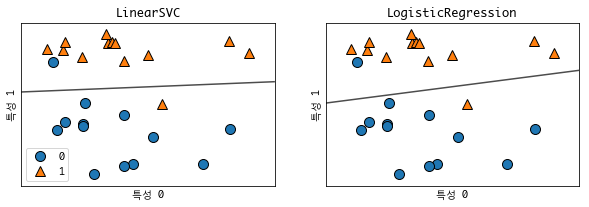

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

두 모델 모두 릿지와 마찬가지로 L2 규제를 사용한다. 규제의 강도를 결정하는 매개변수는 C이다. C 값이 커지면 규제가 감소한다.(훈련 세트에 최대한 맞추려 한다.)

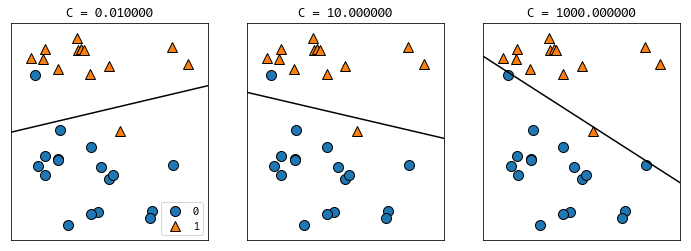

In [31]:
mglearn.plots.plot_linear_svc_regularization()

회귀와 마찬가지로 낮은 차원의 데이터에서는 결정 경계가 직선이나 평면이어서 제한적인 것으로 보이지만 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 과대적합되지 않도록 하는 것이 중요해진다.

유방암 데이터를 가지고 로지스틱 회귀를 분석한다.

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


정확도는 높지만 훈련 세트와 테스트 세트의 성능이 비슷하므로 과소적합인 것 같다. 제약을 풀어주기 위해 C를 증가시켰다.

In [33]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965
훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


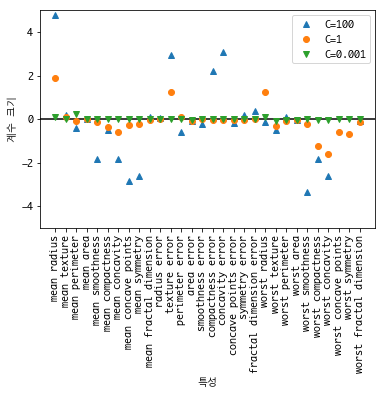

In [34]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

texture error 특성은(값이 +이므로) 악성인 샘플과 관련이 깊다. mean perimeter의 경우 C에 따라 부호가 바뀌므로 양성이나 악성의 신호 모두가 될 수 있다.

더 이해하기 쉬운 모델을 원하면 (일부 특성만 사용하는) L1 규제를 사용하는 것이 좋다. 아래는 L1 규제를 사용할 때의 분류 정확도와 계수 그래프이다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


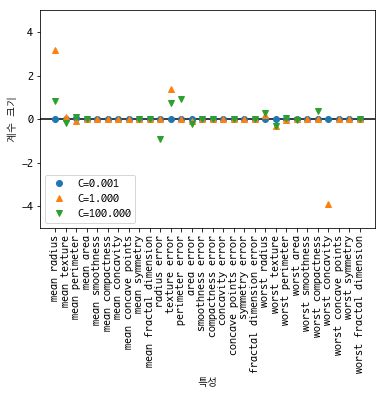

In [35]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

#### 다중 클래스 분류용 선형 모델
로지스틱 회귀를 제외한 다른 선형 분류 모델은 태생적으로 이진 분류만을 지원한다.(로지스틱 회귀는 소프트맥스 함수를 사용한 다중 클래스 분류를 지원한다.) 이진 분류를 다중 클래스 분류로 확장하는 보편적인 기법은 일대다*one-vs.-rest*방법이다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시켜 각 클래스의 수 만큼 이진 분류 모델을 만든다. 예측시 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.

클래스별 이진 분류기를 만들면 분류 신뢰도를 나타내는 다음 공식의 값이 가장 높은 클래스가 선택된다.
$$w[0]\times x[0]+w[1]\times x[1]+...+w[p]\times x[p]+b$$

* 다중 클래스 로지스틱 회귀 공식 $$Pr(Y_i=c)={e^{W_{c}X_i} \over \sum_{k=1}^K e^{W_k X_i}}$$
 i번째 데이터 포인트 $X_i$의 출력 $Y_i$가 클래스 c일 확률 $Pr(Y_i=c)$는 K개의 클래스에 대한 각 계수 W를 데이터 포인트에 곱하여 지수함수를 적용한 합으로 클래스 c에 대한 값을 나누어 계산한다. 보통 소프트맥스 함수의 표현에서 수식의 간소함을 위해 절편 b는 계수 벡터 W에 포함되어 있는 것으로 나타낸다.

세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용해본다. 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포를 따른다.

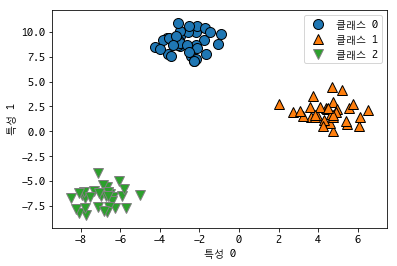

In [36]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

이 데이터셋으로 LinearSVC 분류기를 훈련시킨다.

In [37]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


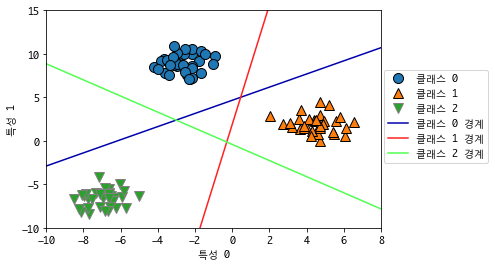

In [38]:
# 세 클래스의 경계를 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

중앙의 삼각형 영역은 세 분류기 모두 나머지로 분류한 내용이다. 이 사이에 있는 값의 클래스는 가장 가까운 직선을 따른다.

아래는 모든 평면에 대한 예측 그래프이다.

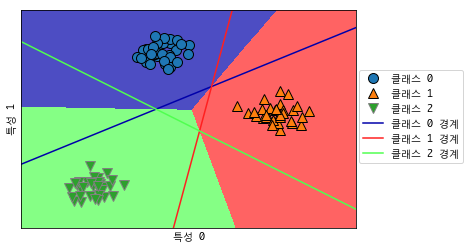

In [39]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 장단점과 매개변수
선형 모델의 매개변수는 회귀에서는 alpha였고 분류에서는 C이다. alpha는 클수록, C는 작을수록 모델이 단순해진다. 이를 조정할때는 보통 로그 스케일로 최적치를 정한다. L1, L2 규제중 어떤 것을 사용할지는 중요한 특성의 존재가 많은지 여부에 따라 달라지며 기본적으로 L2를 사용한다.

선형 모델은 학습 속도가 빠르고 예측도 빠르다. 큰 데이터셋과 희소한 데이터셋에도 잘 작동한다. 수십만~수백만의 큰 데이터셋이라면 더 빠른 처리를 위해 LogisticRegression과 Ridge에 `solver='sag'`옵션을 준다. 또는 선형 모델의 대용량 처리 버전인 `SGDClassifier`와 `SGDRegressor`를 사용할 수 있다.

* sag : Stochastic Average Gradient descent(확률적 평균 경사 하강법)의 약자.
* SGD : Stochastic Gradient Descent(확률적 경사 하강법)의 약자

선형 모델은 샘플에 비해 특성이 많을 때 잘 작동한다. 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋을 수 있다.

### 나이브 베이즈 분류기
나이브 베이즈*naive bayes* 분류기는 선형 모델과 유사하다. 훈련속도가 빠르지만 일반화 성능이 조금 떨어진다.

각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합한다. scikit-learn에는 GaussianNB, BernoulliNB, MultinomialNB가 구현되어 있다. GaussianNB은 모든 연속적인 데이터에, BernoulliNB는 이진 데이터에, MultinomialNB는 이산적인 카운트 데이터에 적용된다.

BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 센다.

In [40]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

클래스가 0인 데이터(1번 3번)에 대해 첫번째 특성의 값 중 1이 몇개인지 센다(0개), 마찬가지로 다른 클래스와 다른 특성에 대해서도 센다.

In [41]:
counts = {}
for label in np.unique(y):  # array([0, 1])
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)  # 행을 따라 합산
print("특성 카운트:\n{}".format(counts))

특성 카운트:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomialNB는 클래스별로 특성의 평균을 계산하고 GaussianNB는 클래스별로 각 특성의 표준편차와 평균을 저장한다. 예측할 땐 데이터를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 한다.

#### 장단점과 매개변수
BernoulliNB, MultinomialNB은 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있다. alpha가 주어지면 모든 특성에 양의 값을 가진 가장의 데이터 포인트를 alpha개만큼 추가한다. 이는 통계 데이터를 완만하게 만들어 모델의 복잡도를 낮추어준다.

GaussianNB는 대부분 매우 고차원 데이터셋에 사용하고 다른 두 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용한다.

나이브 모델의 장단점은 선형 모델과 비슷하다. 훈련과 예측 속도가 빠르고 훈련 과정을 이해하기 쉽다. 희소한 고차원 데이터에서 잘 작동하며 매개변수에 민감하지 않다. 선형 도멜로 학습 시간이 너무 오래 걸리는 큰 데이터셋에는 나이브 베이즈 모델이 종종 사용된다.

### 결정 트리
결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습.

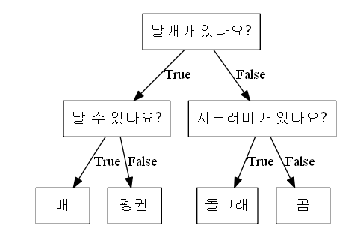

In [42]:
mglearn.plots.plot_animal_tree()

#### 결정 트리 만들기
결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 것. 타겟을 가장 많이 구분할 수 있는 값을 찾는다.

* 루트 노드 : 포인트 모두를 포함한 전체 데이터셋

two_moons : 각 클래스에 데이터가 75개씩 있는 2차원 데이터셋

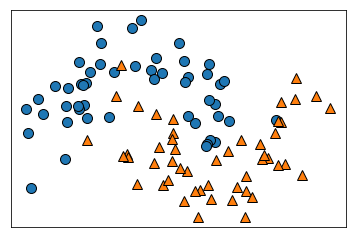

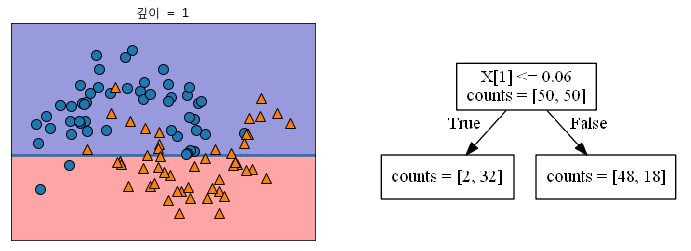

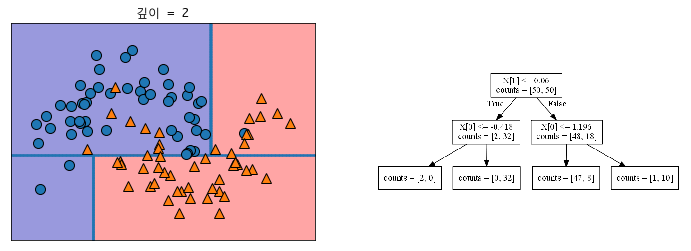

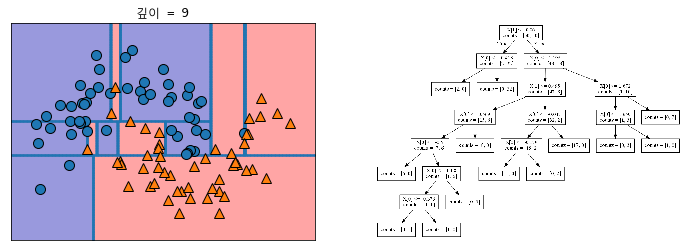

In [43]:
mglearn.plots.plot_tree_progressive()

#### 결정 트리의 복잡도 제어하기
트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합된다. 이를 막기 위한 전략은 트리 생성을 일찍 중단하는 **사전 가지치기** *pre-pruning*전략과 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 **사후 가지치기** 또는 그냥 **가지치기** 전략이 있다. scikit-learn은 사전 가지치기만 제공한다.

scikit-learn는 결정 트리는 `DecisionTreeRegressor`와 `DecisionTreeClassifier`에 구현되어 있다.

아래는 유방암 데이터를 대상으로 완전한 트리 모델을 만들고 트리의 깊이를 4로 제한한 가지치기 트리와 비교한다.

In [46]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


scikit-learn은 그래프 툴인 graphviz의 .dot 포맷으로 출력하는 기능을 제공한다. graphviz나 이를 지원하는 프로그램으로 출력할 수 있다.

트리를 시각화하는 것은 알고리즘 예측을 하는데에 좋지만 깊은 트리는 분석하기 힘들다. 이럴때는 많은 수의 데이터가 흐르는 경로를 찾아보면 좋다.

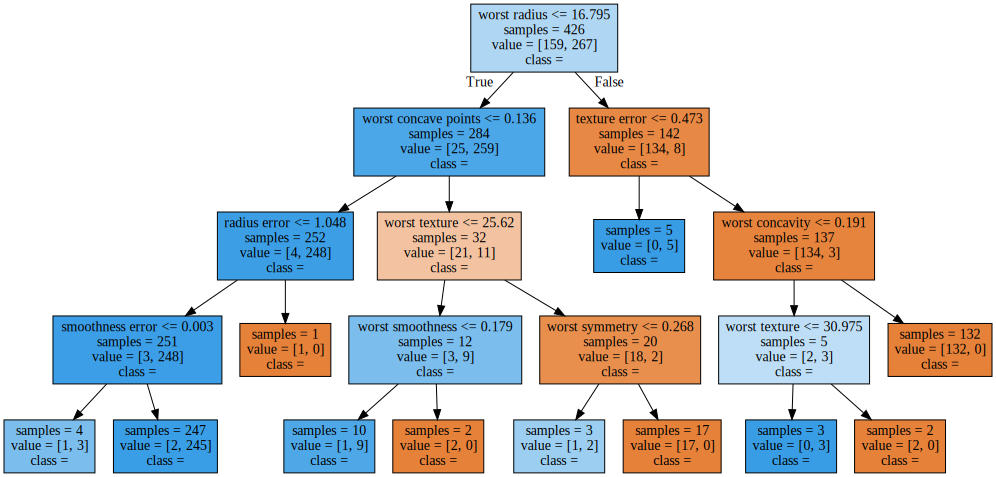

In [51]:
#-*- coding:utf-8 -*-
from sklearn.tree import export_graphviz
import graphviz


export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 트리의 특성 중요도
**특성 중요도** *feature importance*: 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 값. 0~1사이이며 특정 중요도의 전체 합은 1이다.

어떤 특성의 중요도 값이 낮다고 해서 유용하지 않다는 뜻은 아니며, 단지 트리가 그 특성을 선택하지 않았다는 뜻이다. 다른 특성이 동일한 정보를 가지고 있어서일 수도 있다. 특성은 항상 양수이며 특성이 어느 클래스를 지지하는지는 알 수 없다. 특성과 클래스에는 간단하지 않은 관계가 있을 수 있다.

특성 중요도:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


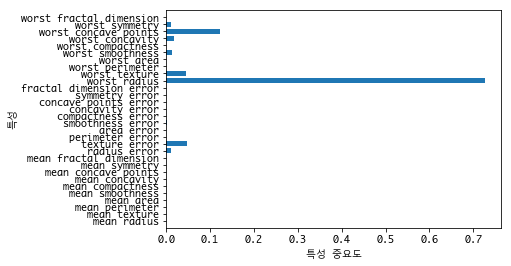

In [53]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


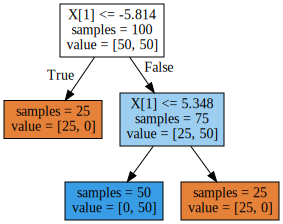

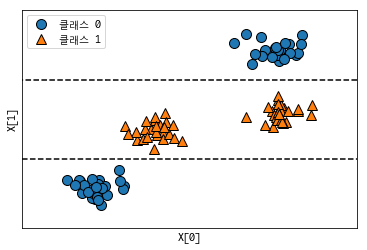

In [55]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

위 그래프에서 특성은 y축에 단순히 비례/반비례하지 않는다.

회귀를 위한 트리 기반의 모델은 **외삽** *extrapolation*, 즉 훈련 데이터의 범위 밖의 포인트에 대해 예측할 수 없다.  
아래는 로그 스케일로 그린 연도별 RAM 가격이다.

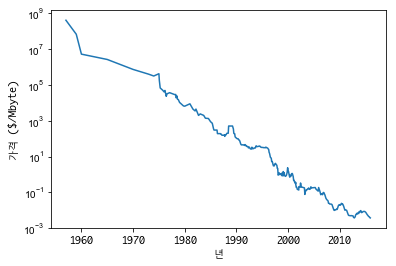

In [58]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

2000년 전까지의 데이터로 2000년 후의 데이터를 예측해보자. 선형회귀와 트리회귀를 비교한다. 모델을 훈련시키고 예측을 수행한 후 로그 스케일로 되돌린다.

선형 모델은 직선으로 데이터를 근사하여 결과를 예측하지만 트리 모델은 훈련 데이터는 완벽히 예측하지만 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 사용해 예측한다. 이는 모든 트리 기반 모델의 공통된 단점이다.

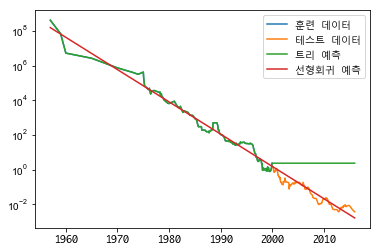

In [59]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

#### 장단점과 매개변수
트리에서는 복잡도를 조절하기 위해 사전 가지치기를 한다. 보통은 사전 자기치기 방법 중 max_depth, max_leaf_nodes(리프 노드의 최대 개수 지정), min_samples_leaf(리프 노드가 되기 위한 최소한의 샘플 개수를 지정) 중 하나만 지정해도 과대적합을 막는데 충분하다.

결정 트리가 다른 알고리즘들보다 나은 점
1. 만들어진 모델을 쉽게 시각화할 수 있어 분석이 쉽다.
1. 데이터의 스케일에 구애받지 않으며 특성의 정규화나 표준화 같은 전처리 과정이 필요 없다. 특성의 스케일이 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동한다.

단점
1. 사전 가지치기를 사용함에도 과대적합하는 경향이 있다.

이를 보완하기 위해 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용한다.

### 결정 트리의 앙상블